In [26]:
#windows machine
#!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [27]:
#!pip install transformers pandas numpy

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [2]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [3]:
#Test the model functionality

#tokenize the sentence
tokens = tokenizer.encode('This is the best streak I have ever had.', return_tensors='pt')
print(tokens)

tensor([[  101, 10372, 10127, 10103, 11146, 69217,   151, 10574, 15765, 10407,
           119,   102]])


In [4]:
#results on a scale of 1-5 with probability displayed respectively
result = model(tokens)
print(result.logits)

tensor([[-1.8257, -2.1205, -1.2404,  0.6951,  3.8157]],
       grad_fn=<AddmmBackward0>)


In [5]:
#Result of sentiment analysis on a scale of 1-5, 1 being extremely negative, 5 being extremely positive
int(torch.argmax(result.logits))+1

5

In [6]:
#Lets grab some DATA!!!
import pandas as pd

data=pd.read_csv("MadeMeSmile_jk.csv",encoding='latin1')
data.head()

,Column1,Column2,Rating
0,0,20 years?! I feel old now,1
1,1,Good for Scrat but sad for me.,2
2,2,Why do I feel sad?,1
3,3,"It_ ok, you can rest now",2
4,4,So long folks!,3


In [7]:
comments = data['Column2']
rating = data['Rating']
comments = comments[:950]

In [16]:
#Store erroneous evaluations for analysis
errors = []
neg = 0
neut = 0
pos = 0

#generalize the scale of 1-5 by making 1-2 = 1 and 4-5 = 3
for i in range(1,len(comments)):
    comment = comments[i]
    tokens = tokenizer.encode(comment, return_tensors='pt')
    result = model(tokens)
    pred = int(torch.argmax(result.logits))+1
    if pred in [1,2]:
        pred = 1
        neg += 1
    elif pred in [4,5]:
        pred = 3
        pos += 1
    elif pred in [3]:
        pred = 2
        neut += 1
    if pred != int(rating[i]):
        errors.append((i+1,comments[i],pred,int(rating[i])))

In [17]:
#check accuracy of model on manually labeled data
acc = 1-len(errors)/len(comments)
print(len(errors))
print(acc)
print(neg)
print(neut)
print(pos)

240
0.7473684210526316
260
100
589


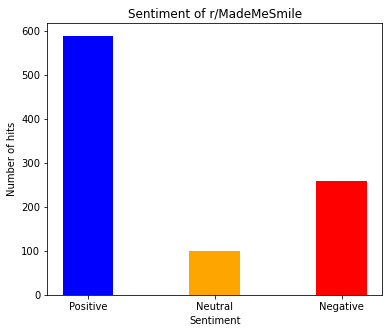

In [23]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Positive':pos, 'Neutral':neut, 'Negative':neg}
label = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(label, values, color =['blue', 'orange', 'red'],
        width = 0.4)
 
plt.xlabel("Sentiment")
plt.ylabel("Number of hits")
plt.title("Sentiment of r/MadeMeSmile")
plt.show()

In [14]:
#observe errors in detail
errors

[(6,
  'Looked forward to that little fucker before every movie*pours one for the homie.',
  3,
  1),
 (8, 'I didn_ realize how complete this would make me feel', 2, 3),
 (14,
  "I love his facial expression in the end though, it's like he's saying: ' Look at this, Putin, you fucking bitch'",
  2,
  3),
 (34,
  'I surprised to see so many uncovered faces, not for covid reasons but for safety',
  3,
  1),
 (40, 'Congratulations! Now move that fridge to the left ??', 1, 3),
 (42,
  'If you don mind me asking, how did you pull this off? Did you land a job somewhere and how did you manage those responsibilities while being homeless?\n\nSorry for prying but I genuinely pumped for you and curious as to how you managed to achieve something that seems impossible for so many. Cheers to you my friend!',
  1,
  3),
 (44, 'You dropped this ??', 1, 2),
 (46, 'Noice! Congrats!', 1, 3),
 (48, 'Not feeling creepy AND fresh tamales!? Yooooooo!!', 1, 3),
 (51, 'Hey, that_ me! Lol.', 1, 3),
 (54,
  'I us